In [1]:
def generate_solution(nx, ny, Lx, Ly, cx, cy, s):
    dx, dy = Lx/(nx-1), Ly/(ny-1)
    dt = DT
    tend = TEND
    t = 0

    cfl_x, cfl_y = cx * dt/dx, cy * dt/dy
    diff_x, diff_y = s * dt/dx**2, s * dt/dy**2

    u = np.zeros((nx+2, ny+2))
    sol = []
    source_x, source_y = nx // 2, ny // 2
    u[source_x, source_y] = 1.0 # Cocentration starts from the central peak
    
    while t < tend:
        unew = u.copy()
        sol.append(u[1:-1, 1:-1])

         # Advection (Upwind Scheme)
        unew[1:-1, 1:-1] -= cfl_x * (u[1:-1, 1:-1] - u[1:-1, :-2])
        unew[1:-1, 1:-1] -= cfl_y * (u[1:-1, 1:-1] - u[:-2, 1:-1])
    
        # Diffusion (Central Differencing)
        unew[1:-1, 1:-1] += diff_x * (u[1:-1, 2:] - 2*u[1:-1, 1:-1] + u[1:-1, :-2])
        unew[1:-1, 1:-1] += diff_y * (u[2:, 1:-1] - 2*u[1:-1, 1:-1] + u[:-2, 1:-1])

        u = unew
        t += dt

    '''
    We transpose the axis the solution. Such that:
    - Axis 0: x
    - Axis 1: y
    - Axis 2: time
    Interpretation: For each x-grid, we have the concentration of each y-grid over time.
    Essentially, the (ny, 1200) array represents the concentration at each y over the time.
    So we have an array of size 1200 for each y. (A curve)
    '''
    sol = np.transpose(sol, (1, 2, 0))
    return np.array(sol)

In [14]:
import numpy as np
Nx, Ny= 50, 50  # Grid points
Lx, Ly = 1.0, 1.0  # Domain size in meters
x, y = np.linspace(0, Lx, Nx), np.linspace(0, Ly, Ny)  # Centered at (0,0)
cx, cy = 0.5, 0.5
s = 5e-5
TEND = 0.1
DT = 0.001

observed = generate_solution(Nx, Ny, Lx, Ly, cx, cy, s)

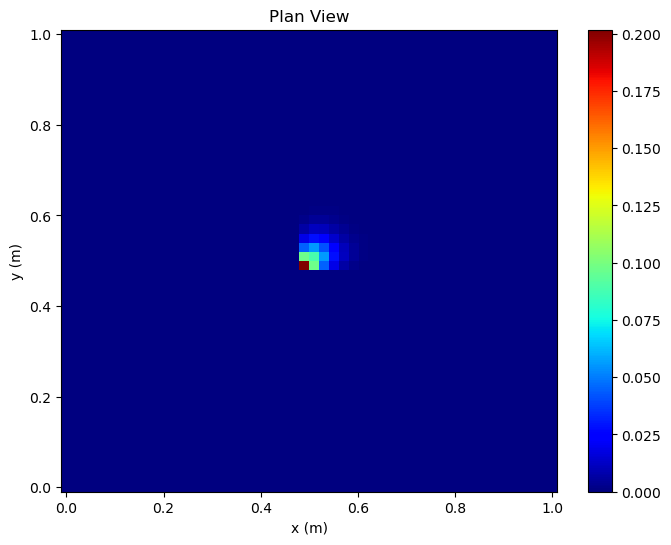

In [15]:
import matplotlib.pyplot as plt
X, Y = np.meshgrid(x, y)
plt.figure(figsize=(8,6))
plt.pcolor(X, Y, np.mean(observed, axis=2), cmap='jet', shading='auto')
plt.colorbar()
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Plan View")
plt.show()

In [4]:
observed.shape

(50, 50, 100)

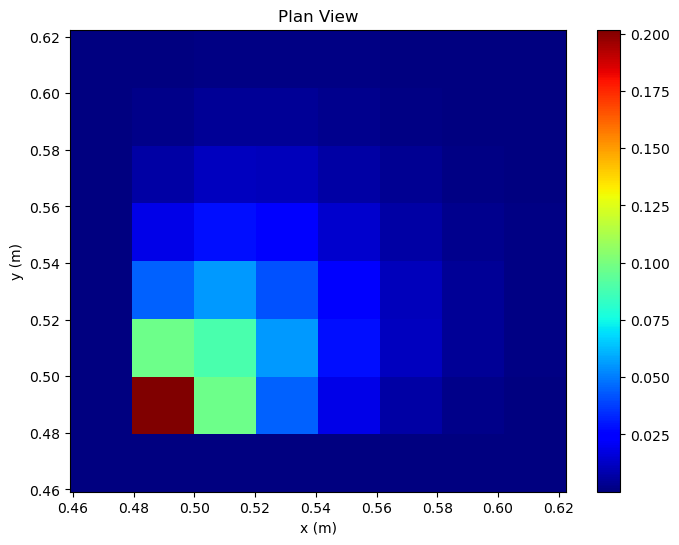

In [21]:
# Define the relevant index range manually
x_min_idx, x_max_idx = 23, 31  # Find the grids that have some values for plume concentration
y_min_idx, y_max_idx = 23, 31

# Subset the arrays
filtered_observed = observed[y_min_idx:y_max_idx, x_min_idx:x_max_idx, :]
filtered_x = x[x_min_idx:x_max_idx]
filtered_y = y[y_min_idx:y_max_idx]

# Create the meshgrid
filtered_X, filtered_Y = np.meshgrid(filtered_x, filtered_y)

plt.figure(figsize=(8,6))
plt.pcolor(filtered_X, filtered_Y, np.mean(filtered_observed, axis=2), cmap='jet', shading='auto')
plt.colorbar()
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Plan View")
plt.show()

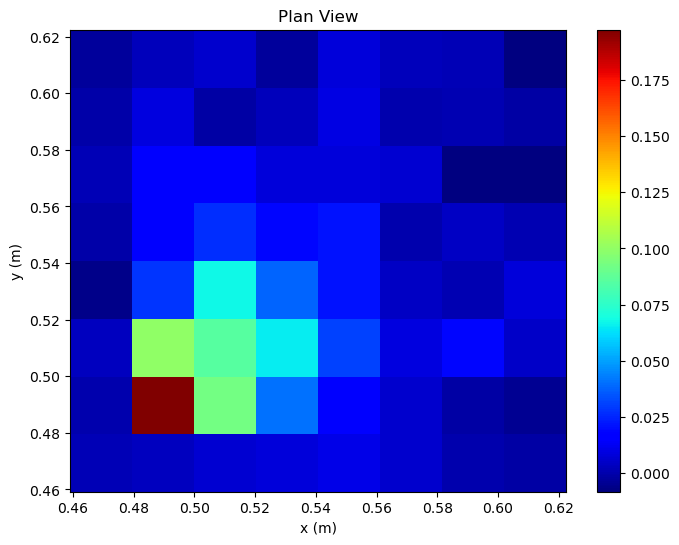

In [23]:
# Constant noise model - Adding gaussian noise to the observed
# Low Noise
# noise = np.random.normal(0, 0.025, (8, 8, 100))
# Medium Noise
# noise = np.random.normal(0, 0.05, (8, 8, 100))
# High Noise
noise = np.random.normal(0, 0.075, (8, 8, 100))
filtered_observed_noise = filtered_observed + noise

# Linear Noise
# linear_noise = np.zeros((8, 8, 100))
# temp_filtered_observed = np.transpose(filtered_observed, (2, 0, 1))
# for i in range(temp_filtered_observed.shape[0]):
#     temp_filtered_observed[i] = temp_filtered_observed[i] + np.random.normal(0, i*0.001, (8, 8))
    
# filtered_observed_noise = np.transpose(temp_filtered_observed, (1, 2, 0))

plt.figure(figsize=(8,6))
plt.pcolor(filtered_X, filtered_Y, np.mean(filtered_observed_noise, axis=2), cmap='jet', shading='auto')
plt.colorbar()
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Plan View")
plt.show()

In [25]:
np.save("no_noise.npy",filtered_observed)

In [5]:
import numpy as np
np.load("runs/0.025_noise/run1_sim_time.npy")

array([[0.00000000e+00, 3.05533409e-03, 1.15804029e+00, 3.12113762e-03],
       [9.70840454e-04, 2.19511986e-03, 0.00000000e+00, 1.99389458e-03],
       [9.98497009e-04, 1.99437141e-03, 0.00000000e+00, 2.14910507e-03],
       [0.00000000e+00, 2.14672089e-03, 1.00660324e-03, 2.01439857e-03],
       [0.00000000e+00, 2.02322006e-03, 9.96828079e-04, 2.13837624e-03]])